In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
palette=sns.color_palette("rocket")


from pcoptim import LeastSquares
from pcoptim import coordinate_descent, gradient_descent, greedy_coordinate_descent
from pydaha.datasets.normal import make_regression
from pydaha.optimals import optimal_objective

In [2]:
p = 2

w0 = [0] * p
w = [0] * p
w[0] = 100

X, y, _ = make_regression(1000, p, w, seed=42)

In [3]:
loss = LeastSquares(X, y)
coef, opt = optimal_objective(X, y, "ls", "none", "none")

In [21]:
epsilon, delta =1, 1e-6
clip = 35

ret = coordinate_descent(loss, w0, max_iter=20, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params = np.array(ret.params_)

ret2 = gradient_descent(loss, w0, max_iter=20, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params2 = np.array(ret2.params_)

ret3 = greedy_coordinate_descent(loss, w0, max_iter=20, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params3 = np.array(ret3.params_)


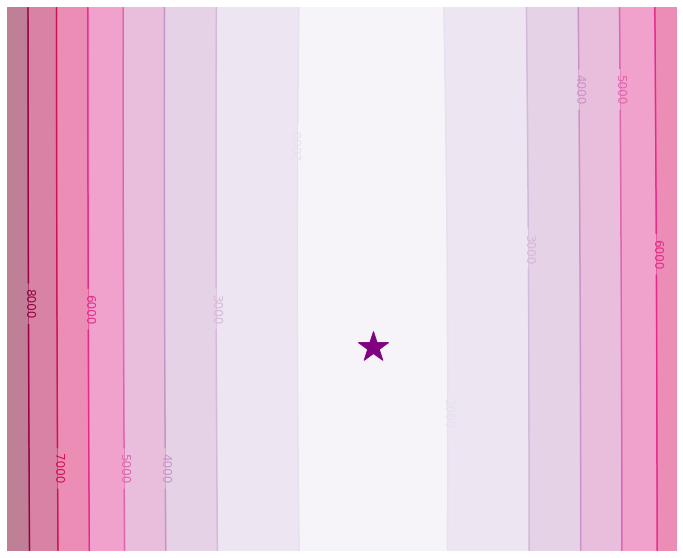

In [22]:

npoints=100
xlist = np.linspace(-20.0, 200.0, npoints)
ylist = np.linspace(-5.0, 5.0, npoints)
xx, yy = np.meshgrid(xlist, ylist)

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

plt.axis("off")

plt.savefig("example_none.pdf", bbox_inches="tight")

plt.show()

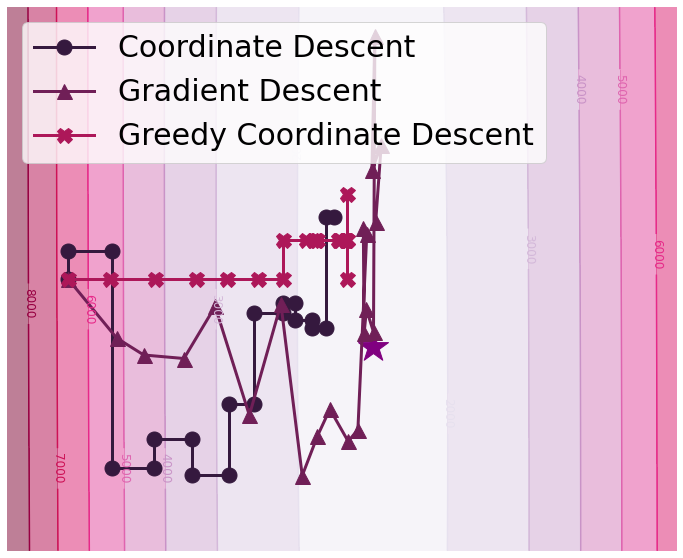

In [25]:

npoints=100
xlist = np.linspace(-20.0, 200.0, npoints)
ylist = np.linspace(-5.0, 5.0, npoints)
xx, yy = np.meshgrid(xlist, ylist)

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([params, params2, params3]):
    hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Coordinate Descent", "Gradient Descent", "Greedy Coordinate Descent"], 
           fontsize=30, loc="upper left")
plt.axis("off")

plt.savefig("example_3.pdf", bbox_inches="tight")

plt.show()

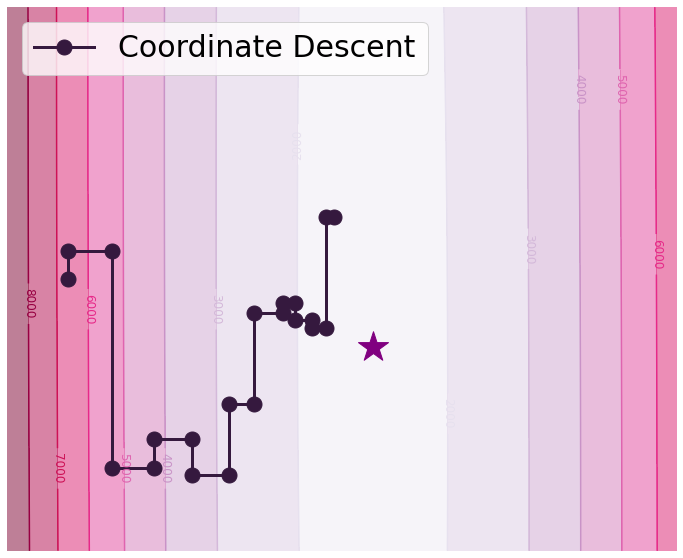

In [26]:

npoints=100
xlist = np.linspace(-20.0, 200.0, npoints)
ylist = np.linspace(-5.0, 5.0, npoints)
xx, yy = np.meshgrid(xlist, ylist)

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([params]):
    hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Coordinate Descent", "Gradient Descent", "Greedy Coordinate Descent"], 
           fontsize=30, loc="upper left")
plt.axis("off")
plt.savefig("example_1.pdf", bbox_inches="tight")
plt.show()

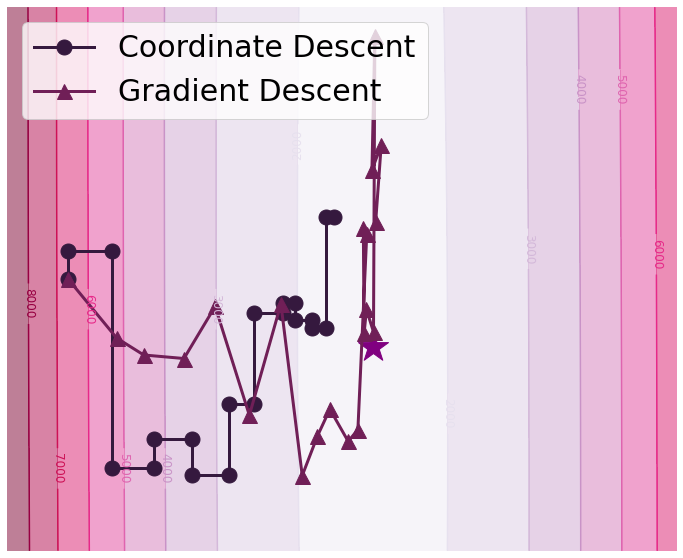

In [27]:

npoints=100
xlist = np.linspace(-20.0, 200.0, npoints)
ylist = np.linspace(-5.0, 5.0, npoints)
xx, yy = np.meshgrid(xlist, ylist)

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([params, params2]):
    hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Coordinate Descent", "Gradient Descent", "Greedy Coordinate Descent"], 
           fontsize=30, loc="upper left")
plt.axis("off")
plt.savefig("example_2.pdf", bbox_inches="tight")
plt.show()

In [28]:
from matplotlib import rcParams
rcParams['hatch.linewidth'] = 1.

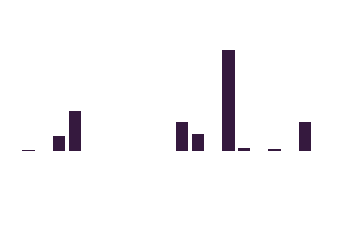

In [29]:
rng = np.random.default_rng(seed=42)
grad = rng.lognormal(sigma=5,size=20)
grad
plt.bar(np.arange(20), grad, color=palette[0])
plt.ylim(-200, 400)
plt.axis("off")
plt.savefig("grad_example_1.pdf", bbox_inches="tight")

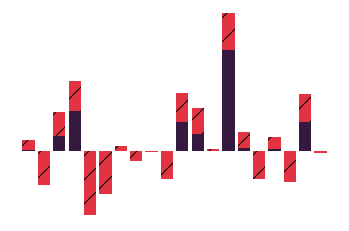

In [30]:
rng = np.random.default_rng(seed=42)
noise = rng.normal(scale=20*np.sqrt(20), size=20)
plt.bar(np.arange(20), grad, color=palette[0])
plt.bar(np.arange(20), noise, bottom=grad, color=palette[3], hatch="/")
plt.ylim(-200, 400)
plt.axis("off")
plt.savefig("grad_example_2.pdf", bbox_inches="tight")

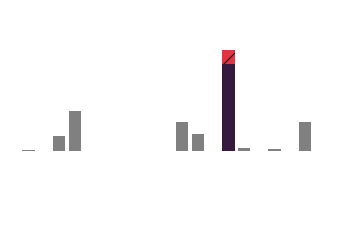

In [31]:
rng = np.random.default_rng(seed=123)
noise = np.zeros(20)
noise[13] = rng.normal(scale=40, size=1)
plt.bar(np.arange(20), grad, color="grey")
plt.bar([13], grad[13], color=palette[0])
plt.bar(np.arange(20), noise, bottom=grad, color=palette[3], hatch="/")
plt.ylim(-200, 400)
plt.axis("off")
plt.savefig("grad_example_3.pdf", bbox_inches="tight")

In [35]:
epsilon, delta =0, 1e-6
clip = 200

retnopriv = coordinate_descent(loss, w0, max_iter=10, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
paramsnopriv = np.array(retnopriv.params_)

ret2nopriv = gradient_descent(loss, w0, max_iter=10, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params2nopriv = np.array(ret2nopriv.params_)

ret3nopriv = greedy_coordinate_descent(loss, w0, max_iter=10, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params3nopriv = np.array(ret3nopriv.params_)


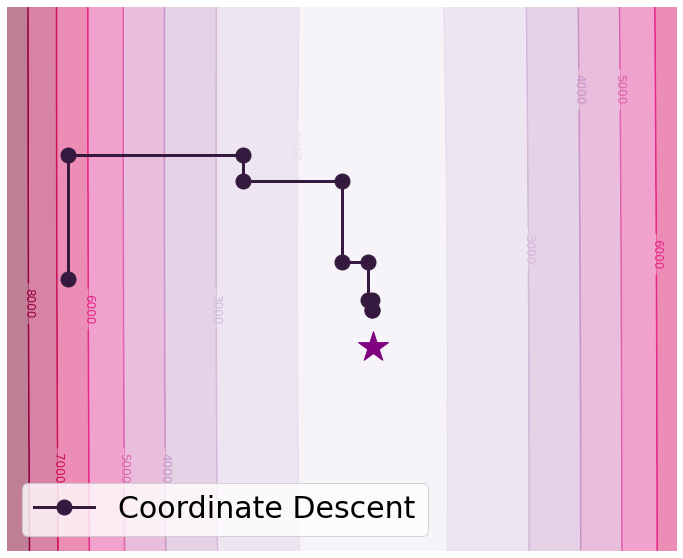

In [36]:

npoints=100
xlist = np.linspace(-20.0, 200.0, npoints)
ylist = np.linspace(-5.0, 5.0, npoints)
xx, yy = np.meshgrid(xlist, ylist)

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([paramsnopriv]):#, params2nopriv, params3nopriv]):
    hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Coordinate Descent", "Gradient Descent", "Greedy Coordinate Descent"], 
           fontsize=30, loc="lower left")
plt.axis("off")

plt.savefig("example_1_nopriv.pdf", bbox_inches="tight")

plt.show()

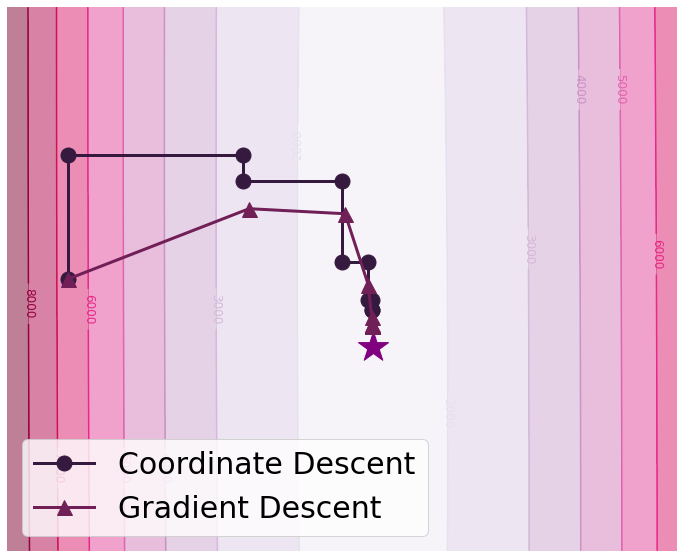

In [37]:

npoints=100
xlist = np.linspace(-20.0, 200.0, npoints)
ylist = np.linspace(-5.0, 5.0, npoints)
xx, yy = np.meshgrid(xlist, ylist)

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([paramsnopriv, params2nopriv]):#, params3nopriv]):
    hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Coordinate Descent", "Gradient Descent", "Greedy Coordinate Descent"], 
           fontsize=30, loc="lower left")
plt.axis("off")

plt.savefig("example_2_nopriv.pdf", bbox_inches="tight")

plt.show()

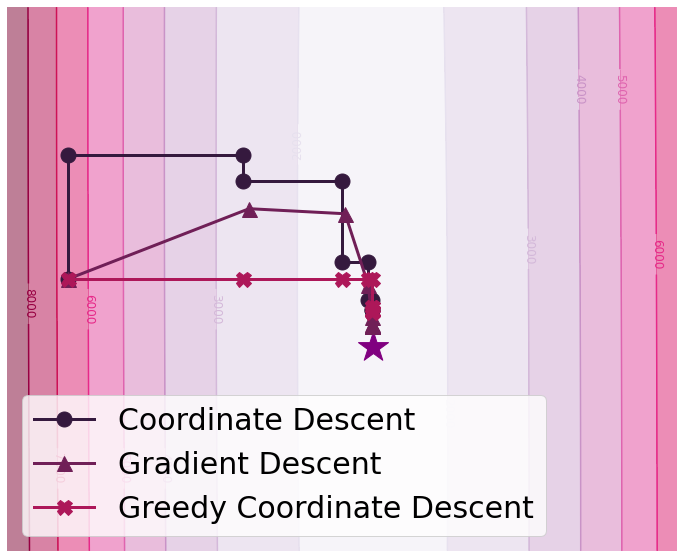

In [38]:

npoints=100
xlist = np.linspace(-20.0, 200.0, npoints)
ylist = np.linspace(-5.0, 5.0, npoints)
xx, yy = np.meshgrid(xlist, ylist)

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([paramsnopriv, params2nopriv, params3nopriv]):
    hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Coordinate Descent", "Gradient Descent", "Greedy Coordinate Descent"], 
           fontsize=30, loc="lower left")
plt.axis("off")

plt.savefig("example_3_nopriv.pdf", bbox_inches="tight")

plt.show()